In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

from IPython.display import Image

%matplotlib inline

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 3)

In [90]:
# download the data and name the columns
cols = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']

df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt', names = cols, header=1)
df_week_2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt', names = cols, header=1)
df_week_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt', names = cols, header = 1)
df_week_4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160827.txt', names = cols, header = 1)

#print(df.info())
df = df.append(df_week_2)
df = df.append(df_week_3)
df = df.append(df_week_4)
print(df.info())
#df[df.DATE == '09/16/2016']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772503 entries, 0 to 191610
Data columns (total 11 columns):
C/A         772503 non-null object
UNIT        772503 non-null object
SCP         772503 non-null object
STATION     772503 non-null object
LINENAME    772503 non-null object
DIVISION    772503 non-null object
DATE        772503 non-null object
TIME        772503 non-null object
DESC        772503 non-null object
ENTRIES     772503 non-null int64
EXITS       772503 non-null int64
dtypes: int64(2), object(9)
memory usage: 70.7+ MB
None


In [91]:
df.columns = [column.strip() for column in df.columns]

In [92]:
df["DATE_TIME"] = pd.to_datetime(
    df.DATE 
    + " " 
    + df.TIME, format="%m/%d/%Y %H:%M:%S")

df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,2016-09-10 04:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,2016-09-10 08:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,2016-09-10 12:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,2016-09-10 16:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,20:00:00,REGULAR,5818247,1972245,2016-09-10 20:00:00
5,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,00:00:00,REGULAR,5818403,1972285,2016-09-11 00:00:00
6,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,04:00:00,REGULAR,5818439,1972293,2016-09-11 04:00:00
7,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,08:00:00,REGULAR,5818451,1972308,2016-09-11 08:00:00
8,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,12:00:00,REGULAR,5818522,1972380,2016-09-11 12:00:00
9,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,16:00:00,REGULAR,5818722,1972433,2016-09-11 16:00:00


In [98]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-20 04:00:00,1
514997,R155,R116,01-00-01,50 ST,2016-09-16 04:00:00,1
514988,R155,R116,01-00-01,50 ST,2016-09-14 16:00:00,1
514989,R155,R116,01-00-01,50 ST,2016-09-14 20:00:00,1
514990,R155,R116,01-00-01,50 ST,2016-09-15 00:00:00,1
514991,R155,R116,01-00-01,50 ST,2016-09-15 04:00:00,1
514992,R155,R116,01-00-01,50 ST,2016-09-15 08:00:00,1
514993,R155,R116,01-00-01,50 ST,2016-09-15 12:00:00,1
514994,R155,R116,01-00-01,50 ST,2016-09-15 16:00:00,1
514995,R155,R116,01-00-01,50 ST,2016-09-15 20:00:00,1


In [95]:
mask = ((df["C/A"] == "R504") & 
(df["UNIT"] == "R276") & 
(df["SCP"] == "00-00-01") & 
(df["STATION"] == "VERNON-JACKSON") &
(df["DATE_TIME"] == '2016-09-16 08:00:00'))
df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00


In [96]:
df_test = df.groupby('DESC').count()

df_test

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
DESC,,,,,,,,,,,
RECOVR AUD,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495
REGULAR,770008,770008,770008,770008,770008,770008,770008,770008,770008,770008,770008


In [97]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [99]:
df = (df
      #.groupby('DATE')
      .groupby(['STATION','C/A','UNIT','SCP','DATE'])
      #.sort_values(['ENTRIES'])
      .min()
      .reset_index()
      )

df

,STATION,C/A,UNIT,SCP,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,1 AV,H007,R248,00-00-00,08/20/2016,L,BMT,00:00:00,REGULAR,11426890,12496452,2016-08-20 00:00:00
1,1 AV,H007,R248,00-00-00,08/21/2016,L,BMT,00:00:00,REGULAR,11429080,12500024,2016-08-21 00:00:00
2,1 AV,H007,R248,00-00-00,08/22/2016,L,BMT,00:00:00,REGULAR,11430743,12502988,2016-08-22 00:00:00
3,1 AV,H007,R248,00-00-00,08/23/2016,L,BMT,00:00:00,REGULAR,11434026,12507115,2016-08-23 00:00:00
4,1 AV,H007,R248,00-00-00,08/24/2016,L,BMT,00:00:00,REGULAR,11437540,12511313,2016-08-24 00:00:00
5,1 AV,H007,R248,00-00-00,08/25/2016,L,BMT,00:00:00,REGULAR,11441076,12515638,2016-08-25 00:00:00
6,1 AV,H007,R248,00-00-00,08/26/2016,L,BMT,00:00:00,REGULAR,11444688,12519839,2016-08-26 00:00:00
7,1 AV,H007,R248,00-00-00,08/27/2016,L,BMT,00:00:00,REGULAR,11448160,12524556,2016-08-27 00:00:00
8,1 AV,H007,R248,00-00-00,08/28/2016,L,BMT,00:00:00,REGULAR,11450417,12528696,2016-08-28 00:00:00
9,1 AV,H007,R248,00-00-00,08/29/2016,L,BMT,00:00:00,REGULAR,11452193,12532282,2016-08-29 00:00:00


In [100]:
#ACT_ENTRIES is the actual number of entries, not the cumulative number

df['ACT_ENTRIES'] = df['ENTRIES'] - df['ENTRIES'].shift(1)



In [101]:
df.sort_values('ACT_ENTRIES', ascending = True)

,STATION,C/A,UNIT,SCP,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ACT_ENTRIES
86565,GRD CNTRL-42 ST,R238A,R046,02-00-04,08/20/2016,4567S,IRT,00:00:00,REGULAR,217117,7061,2016-08-20 00:00:00,-2.147e+09
66200,CHAMBERS ST,R116,R030,00-00-03,08/20/2016,123,IRT,00:00:00,REGULAR,6480496,3772717,2016-08-20 00:00:00,-2.108e+09
27424,42 ST-PORT AUTH,N062,R011,01-00-02,08/20/2016,ACENQRS1237,IND,00:00:00,REGULAR,3809065,2745625,2016-08-20 00:00:00,-2.028e+09
1036,104 ST,J034,R007,00-00-03,08/20/2016,JZ,BMT,00:00:00,REGULAR,4179135,4561125,2016-08-20 00:00:00,-2.022e+09
3472,125 ST,R258,R132,00-00-04,08/20/2016,456,IRT,01:00:00,REGULAR,7722570,2270465,2016-08-20 01:00:00,-2.003e+09
16631,23 ST,R226,R131,02-03-00,08/20/2016,6,IRT,01:00:00,REGULAR,9801198,12015501,2016-08-20 01:00:00,-1.987e+09
10107,163 ST-AMSTERDM,N016A,R296,00-00-02,08/20/2016,C,IND,01:00:00,REGULAR,8248193,948743,2016-08-20 01:00:00,-1.944e+09
19454,3 AV-149 ST,R310,R053,01-00-03,08/20/2016,25,IRT,00:00:00,REGULAR,3964476,677508,2016-08-20 00:00:00,-1.941e+09
62588,CANAL ST,A046,R463,00-06-01,08/20/2016,JNQRZ6,BMT,01:00:00,REGULAR,10030428,1844574,2016-08-20 01:00:00,-1.938e+09
73172,DEKALB AV,H023,R236,00-06-01,08/20/2016,L,BMT,00:00:00,REGULAR,1403073,22093,2016-08-20 00:00:00,-1.928e+09


In [102]:
#Because we are taking differences from the day before, we have to drop data from 9/10/2016 because it cannot be accurate
df = df[df.DATE != '08/20/2016']

#there cannot be negative values for entries, so we will remove any points where a turnstile was reset
df = df[df.ACT_ENTRIES > 0]


In [74]:
df.sort_values('ACT_ENTRIES', ascending = True)


,STATION,C/A,UNIT,SCP,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ACT_ENTRIES
9453,59 ST COLUMBUS,R158,R084,00-05-03,09/13/2016,1ABCD,IRT,00:00:00,REGULAR,584,0,2016-09-13 00:00:00,1.000e+00
9773,66 ST-LINCOLN,R159,R164,01-05-00,09/11/2016,1,IRT,01:00:00,REGULAR,2078,0,2016-09-11 01:00:00,1.000e+00
21456,GRD CNTRL-42 ST,R237,R046,01-00-02,09/12/2016,4567S,IRT,00:00:00,REGULAR,5332031,6356879,2016-09-12 00:00:00,1.000e+00
24936,LEXINGTON AV/53,N305A,R016,00-05-00,09/12/2016,EM6,IND,00:00:00,REGULAR,1090866294,1543778589,2016-09-12 00:00:00,1.000e+00
24938,LEXINGTON AV/53,N305A,R016,00-05-00,09/14/2016,EM6,IND,00:00:00,REGULAR,1090866295,1543778589,2016-09-14 00:00:00,1.000e+00
24940,LEXINGTON AV/53,N305A,R016,00-05-00,09/16/2016,EM6,IND,00:00:00,REGULAR,1090866296,1543778589,2016-09-16 00:00:00,1.000e+00
9690,63 DR-REGO PARK,N330C,R202,01-06-00,09/12/2016,MR,IND,00:00:00,REGULAR,100883089,157161,2016-09-12 00:00:00,1.000e+00
9689,63 DR-REGO PARK,N330C,R202,01-06-00,09/11/2016,MR,IND,00:00:00,REGULAR,100883088,157161,2016-09-11 00:00:00,1.000e+00
24985,LEXINGTON AV/53,N306,R017,00-03-00,09/12/2016,EM6,IND,00:00:00,REGULAR,15744164,10205459,2016-09-12 00:00:00,1.000e+00
9589,61 ST WOODSIDE,R523,R147,00-05-00,09/16/2016,7,IRT,01:00:00,REGULAR,2787,0,2016-09-16 01:00:00,1.000e+00


In [104]:
df[['STATION','C/A','UNIT','SCP','DATE_TIME','ACT_ENTRIES', 'WEEKDAY']]




,STATION,C/A,UNIT,SCP,DATE_TIME,ACT_ENTRIES,DATE
1,1 AV,H007,R248,00-00-00,2016-08-21 00:00:00,2190.0,08/21/2016
2,1 AV,H007,R248,00-00-00,2016-08-22 00:00:00,1663.0,08/22/2016
3,1 AV,H007,R248,00-00-00,2016-08-23 00:00:00,3283.0,08/23/2016
4,1 AV,H007,R248,00-00-00,2016-08-24 00:00:00,3514.0,08/24/2016
5,1 AV,H007,R248,00-00-00,2016-08-25 00:00:00,3536.0,08/25/2016
6,1 AV,H007,R248,00-00-00,2016-08-26 00:00:00,3612.0,08/26/2016
7,1 AV,H007,R248,00-00-00,2016-08-27 00:00:00,3472.0,08/27/2016
8,1 AV,H007,R248,00-00-00,2016-08-28 00:00:00,2257.0,08/28/2016
9,1 AV,H007,R248,00-00-00,2016-08-29 00:00:00,1776.0,08/29/2016
10,1 AV,H007,R248,00-00-00,2016-08-30 00:00:00,3306.0,08/30/2016


In [112]:
#gives the day of the week, Monday = 0, Sunday = 6
df['WEEKDAY'] = pd.Series(df['DATE_TIME']).dt.dayofweek
                 
df

,STATION,C/A,UNIT,SCP,DATE,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS,DATE_TIME,ACT_ENTRIES,WEEKDAY
1,1 AV,H007,R248,00-00-00,08/21/2016,L,BMT,00:00:00,REGULAR,11429080,12500024,2016-08-21 00:00:00,2190.0,6
2,1 AV,H007,R248,00-00-00,08/22/2016,L,BMT,00:00:00,REGULAR,11430743,12502988,2016-08-22 00:00:00,1663.0,0
3,1 AV,H007,R248,00-00-00,08/23/2016,L,BMT,00:00:00,REGULAR,11434026,12507115,2016-08-23 00:00:00,3283.0,1
4,1 AV,H007,R248,00-00-00,08/24/2016,L,BMT,00:00:00,REGULAR,11437540,12511313,2016-08-24 00:00:00,3514.0,2
5,1 AV,H007,R248,00-00-00,08/25/2016,L,BMT,00:00:00,REGULAR,11441076,12515638,2016-08-25 00:00:00,3536.0,3
6,1 AV,H007,R248,00-00-00,08/26/2016,L,BMT,00:00:00,REGULAR,11444688,12519839,2016-08-26 00:00:00,3612.0,4
7,1 AV,H007,R248,00-00-00,08/27/2016,L,BMT,00:00:00,REGULAR,11448160,12524556,2016-08-27 00:00:00,3472.0,5
8,1 AV,H007,R248,00-00-00,08/28/2016,L,BMT,00:00:00,REGULAR,11450417,12528696,2016-08-28 00:00:00,2257.0,6
9,1 AV,H007,R248,00-00-00,08/29/2016,L,BMT,00:00:00,REGULAR,11452193,12532282,2016-08-29 00:00:00,1776.0,0
10,1 AV,H007,R248,00-00-00,08/30/2016,L,BMT,00:00:00,REGULAR,11455499,12536188,2016-08-30 00:00:00,3306.0,1


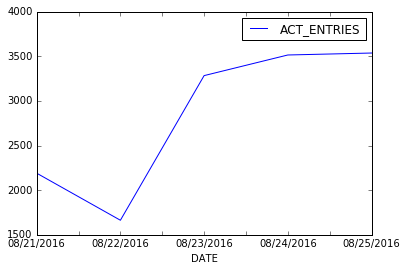

In [113]:
#plots actual entries for a single turnstile (turnstile defined by mask)
mask = ((df["C/A"] == "H007") & 
        (df["UNIT"] == "R248") & 
        (df["SCP"] == "00-00-00") & 
        (df["STATION"] == "1 AV"))

df_plot = df[mask].head()


#df.plot(x='col_name_1', y='col_name_2', style='o')
plt.figure(figsize=(10,3))
df_plot.plot(x='DATE', y='ACT_ENTRIES')



In [125]:
#takes sum of daily turnstile counts in each unique Station, C/A, Unit combo
df_turnstile_sums = (df[['STATION','C/A','UNIT','SCP','DATE_TIME','ACT_ENTRIES','WEEKDAY']]
               #.groupby('DATE')
               .groupby(['STATION','C/A','UNIT','DATE_TIME','WEEKDAY'])
               #.sort_values(['ENTRIES'])
               .sum()
               .reset_index()
                )

df_turnstile_sums


,STATION,C/A,UNIT,DATE_TIME,WEEKDAY,ACT_ENTRIES
0,1 AV,H007,R248,2016-08-21 00:00:00,6,6986.0
1,1 AV,H007,R248,2016-08-22 00:00:00,0,5349.0
2,1 AV,H007,R248,2016-08-23 00:00:00,1,10075.0
3,1 AV,H007,R248,2016-08-24 00:00:00,2,10568.0
4,1 AV,H007,R248,2016-08-25 00:00:00,3,10792.0
5,1 AV,H007,R248,2016-08-26 00:00:00,4,10877.0
6,1 AV,H007,R248,2016-08-27 00:00:00,5,10996.0
7,1 AV,H007,R248,2016-08-28 00:00:00,6,7287.0
8,1 AV,H007,R248,2016-08-29 00:00:00,0,5922.0
9,1 AV,H007,R248,2016-08-30 00:00:00,1,10257.0


In [84]:
#takes daily sum of entries for all turnstile counts in each Station
df_station_sums = (df_turnstile_sums[['STATION','C/A','UNIT','DATE_TIME','ACT_ENTRIES']]
               #.groupby('DATE')
               .groupby(['STATION','DATE_TIME'])
               #.sort_values(['ENTRIES'])
               .sum()
               .reset_index()
                )

df_station_sums



,STATION,DATE_TIME,ACT_ENTRIES
0,1 AV,2016-09-11 00:00:00,18714.0
1,1 AV,2016-09-12 00:00:00,14265.0
2,1 AV,2016-09-13 00:00:00,20132.0
3,1 AV,2016-09-14 00:00:00,23124.0
4,1 AV,2016-09-15 00:00:00,24010.0
5,1 AV,2016-09-16 00:00:00,24361.0
6,103 ST,2016-09-11 01:00:00,14523.0
7,103 ST,2016-09-12 01:00:00,11771.0
8,103 ST,2016-09-13 01:00:00,31183.0
9,103 ST,2016-09-14 01:00:00,35006.0


In [87]:
#plots daily actual entries for a single station over the course of a week
mask = (
        #(df["C/A"] == "H007") & 
        #(df["UNIT"] == "R248") & 
        #(df["SCP"] == "00-00-00") & 
        (df["STATION"] == "1 AV"))

df_plot = df_station_sums[mask].head()

df_plot

#df.plot(x='col_name_1', y='col_name_2', style='o')
#plt.figure(figsize=(10,3))
#df_plot.plot(x='DATE_TIME', y='ACT_ENTRIES')



/Users/zach/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


IndexingError: Unalignable boolean Series key provided

In [15]:
df_clean = df

def clean_turnstiles(start_df, whole_df):
    for row in whole_df:
        for row in start_df:
            if whole_df['STATION'] == start_df['STATION'] and whole_df['SCP'] == start_df['SCP']:
                df_clean['ACT_ENTRIES'] = whole_df['ENTRIES'] - start_df['ENTRIES']
                df_clean['ACT_EXITS'] = whole_df['EXITS'] - start_df['EXITS']
            else:
                continue

clean_turnstiles(df2,df)
    
    
    

NameError: name 'df2' is not defined

In [15]:
#df['new_column'] = df[['lat', 'long']].values.tolist()

In [16]:
df_clean = df
df_clean['ID'] = df[['C/A','UNIT','SCP','STATION']].values.tolist()

df_clean

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ID
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,"[A002, R051, 02-00-00, 59 ST]"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,"[A002, R051, 02-00-00, 59 ST]"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,"[A002, R051, 02-00-00, 59 ST]"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,"[A002, R051, 02-00-00, 59 ST]"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,20:00:00,REGULAR,5818247,1972245,"[A002, R051, 02-00-00, 59 ST]"
5,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,00:00:00,REGULAR,5818403,1972285,"[A002, R051, 02-00-00, 59 ST]"
6,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,04:00:00,REGULAR,5818439,1972293,"[A002, R051, 02-00-00, 59 ST]"
7,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,08:00:00,REGULAR,5818451,1972308,"[A002, R051, 02-00-00, 59 ST]"
8,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,12:00:00,REGULAR,5818522,1972380,"[A002, R051, 02-00-00, 59 ST]"
9,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,16:00:00,REGULAR,5818722,1972433,"[A002, R051, 02-00-00, 59 ST]"


In [17]:
#df_weekdays = df_clean[df_clean.DATE != '09/11/2016']
df_weekdays = (df_clean[df_clean.DATE != '09/10/2016'])
df_weekdays = df_weekdays.drop(('EXITS'), axis = 1)

df_weekdays2 = (df_weekdays
               #.groupby('DATE')
               .groupby(['STATION','C/A','UNIT','SCP','DATE'])
               #.sort_values(['ENTRIES'])
               .min()
               .reset_index()
                )

#df_weekdays2.diff



ValueError: Function does not reduce

In [ ]:
df_weekdays = (df
               .groupby(['STATION','C/A','UNIT','SCP','DATE'])
               .diff 


In [ ]:
df_weekdays = (df_weekdays
               .groupby(['DATE'])
               #.groupby(['STATION','C/A','UNIT','SCP','DATE'])
               #.sort_values(['ENTRIES'])
               .min(axis=1)
               #.reset_index()
               )
df_weekdays

In [ ]:
#df_weekdays = (df_weekdays
               #.groupby(['ID','DATE'])
               #.reset_index()
               #.sort_values(['ENTRIES'], ascending = False)
               #.min()
               



In [ ]:
df_means = (df_means_11[df_means_11.DATE != '09/11/2016']
 .groupby(['STATION', 'DATE'])
 .sum()
 .reset_index()
#Sort starting with Entries
 .sort_values(['ENTRIES'], ascending = False)
            
#Sort starting with exits
# .sort_values(['EXITS'], ascending = False)
 .head(30)
 )